# Homework 5


### Problem 1 (5% credit). 
Which of the techniques among logistic regression and k-means clustering are unsupervised learning (select all that applied): 

- a) both;
- b) k-means clustering, but not the logistic regression;
- c) logistic regression, but not the k-mean clustering;
- d) none of them - both are supervised.

**b**

### Problem 2 (5% credit). 
What is the average silhouette measure used for in the k-means clustering (select all that applies):
- a) determining the percentage of correct cluster definitions over the validation set;
- b) select the most natural number of clusters for the dataset;
- c) determining average size of the clusters;
- d) estimating how more similar on average the elements are to their own clusters vs the most similar neighbor clusters;
- e) quantifying how distinctive the clusters are.

**d**

### Problem 3 (10% credit).
What of the below (select all that apply) is true for the binary classification confusion matrix report:

- a) it reports sizes of each cluster and number of the clusters;
- b) it is a square matrix;
- c) it is symmetrical;
- d) it has dimensions 2x2;
- e) it has dimensions 3x3;
- f) it reports the quality of classification fit over the test set;
- g) it reports the percentage of correctly classified datapoints over the test set;
- h) it reports the percentage of incorrectly classified datapoints over the test set;

**b, d, f **

g, h - well we can easily calculate that from this matrix

In [181]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import scipy
from scipy import stats
%pylab inline
from matplotlib import pyplot as plt
from matplotlib import cm

from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d


Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [182]:
import statsmodels.formula.api as smf
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

In [183]:
yt=[1, 1, 0, 0, 1, 0, 1, 0, 1, 1]
yc=[1, 0, 1, 0, 1, 0, 1, 0, 1, 0]

### Problem 4 (15% credit)
For the above binary classification (yc - classified values, yt - true ones) compute and visualize the confusion matrix as well as precision, recall and accuracy

In [184]:
def getCMatrix(p, a):
    '''generates confusion matrix from two lists, prediction and answer'''
    tp, fp, tn, fn = 0,0,0,0

    for r, cl in zip(a,p):
        if r and  cl: tp+=1
        elif not r and not cl: tn+=1
        elif r and not cl: fn+=1
        elif not r and cl: fp+=1

    # print tp, tn, fn, fp
    cMatrix = pd.DataFrame({'predict 1':[tp,fp],'predict 0':[fn,tn]})
    cMatrix['actual v-s'] = pd.Series(['1','0'])
    cMatrix.set_index('actual v-s', inplace=1)
    cMatrix = cMatrix[['predict 1','predict 0' ]]
    return cMatrix
    
def getPrecission(cMatrix):
    '''calcuates precision ratio'''
    return float(cMatrix.iloc[0,0])/(cMatrix.iloc[0,0] + cMatrix.iloc[1,0])
    
def getRecall(cMatrix):
    '''calcuates recall ratio'''
    return float(cMatrix.iloc[0,0])/(cMatrix.iloc[0,0] + cMatrix.iloc[0,1])

def getAccuracy(cMatrix):
    '''calcuates accuracy ratio'''
    return float(cMatrix.iloc[0,0] + cMatrix.iloc[1,1])/(cMatrix.sum(axis=1).sum())

    

In [185]:
cMatrix = getCMatrix(yc ,yt)
cMatrix

,predict 1,predict 0
actual v-s,,
1,4,2
0,1,3


In [186]:
print 'Precission ratio is :', getPrecission(cm)
print 'Recall ratio is :', getRecall(cm)
print 'Accuracy ratio is :', getAccuracy(cm)

Precission ratio is :

AttributeError: 'module' object has no attribute 'iloc'

In [187]:
data = pd.read_csv( 'https://serv.cusp.nyu.edu/files/ADS-2015/MorningSection/lab5/H51.csv' , index_col=0 )

In [197]:
data

,x1,x2
0,3.554228,7.435315
1,3.710305,7.464536
2,2.629357,7.513200
3,5.429580,8.682926
4,2.354003,6.311812


### Problem 5a (15% credit). 
For the data above define the clustering into 3 clusters using the best outcome of k-means, being run 100 times

In [189]:
km = KMeans(n_clusters=3,n_init=100)
km.fit(data)
data['label'] =km.labels_

print data.head()

         x1        x2  label
0  3.554228  7.435315      0
1  3.710305  7.464536      0
2  2.629357  7.513200      0
3  5.429580  8.682926      0
4  2.354003  6.311812      0


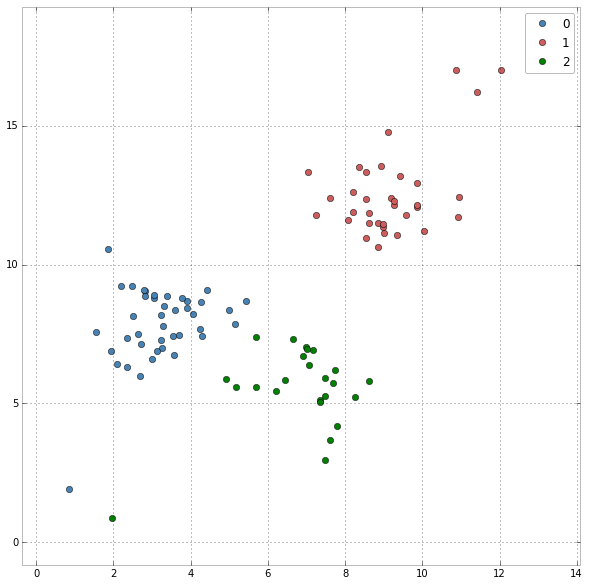

In [190]:
fig, ax = plt.subplots(figsize=(10,10))
ax.margins(0.1)

for name, g in data.groupby('label'):
    ax.plot(g.x1, g.x2, marker='o',linestyle='', label=name, )
    
ax.legend(numpoints=1);

### Problem 5b (20% credit). 
For the data above perfrom k-means clustering for k=2..10, compute and visualize the average Silhouette score, select and visualize the clustering for that k, which maximizes average Silhouette score

In [191]:
data = pd.read_csv( 'https://serv.cusp.nyu.edu/files/ADS-2015/MorningSection/lab5/H51.csv' , index_col=0 )

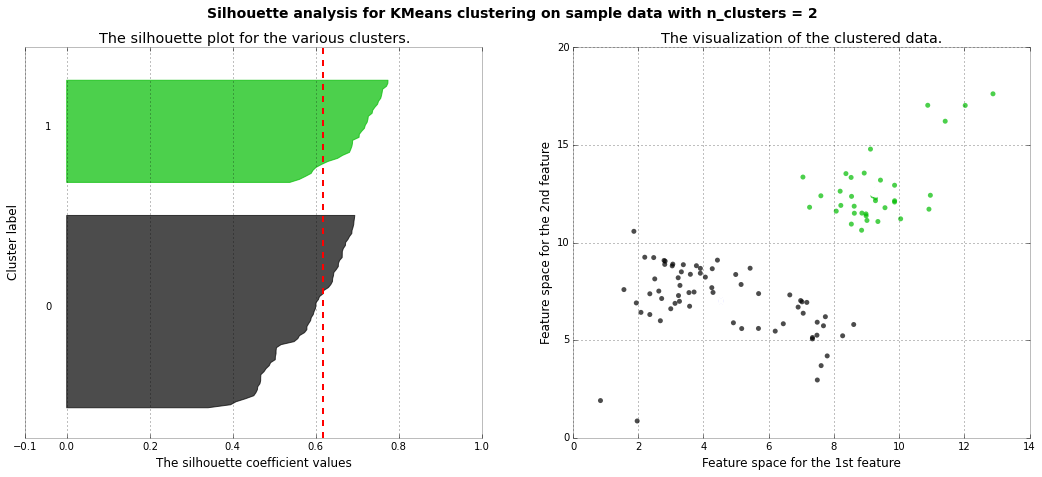

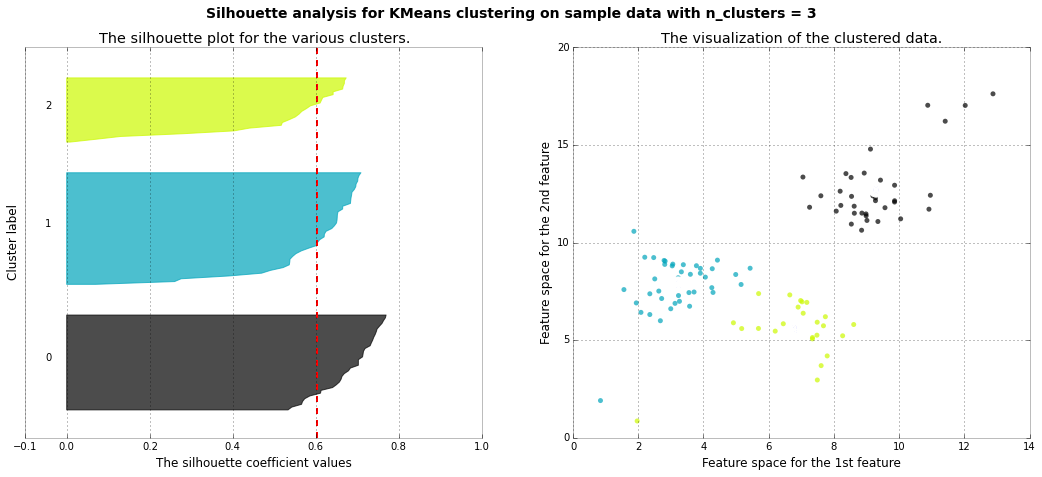

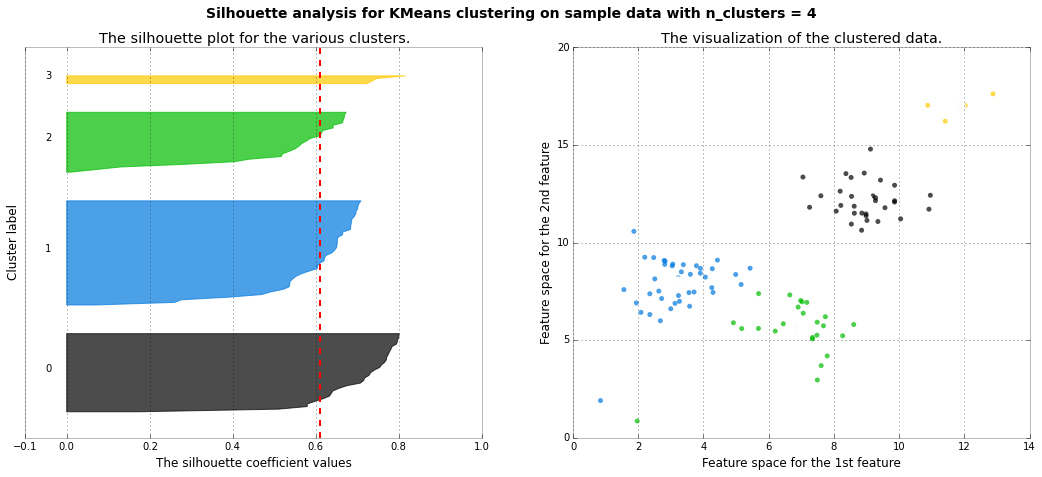

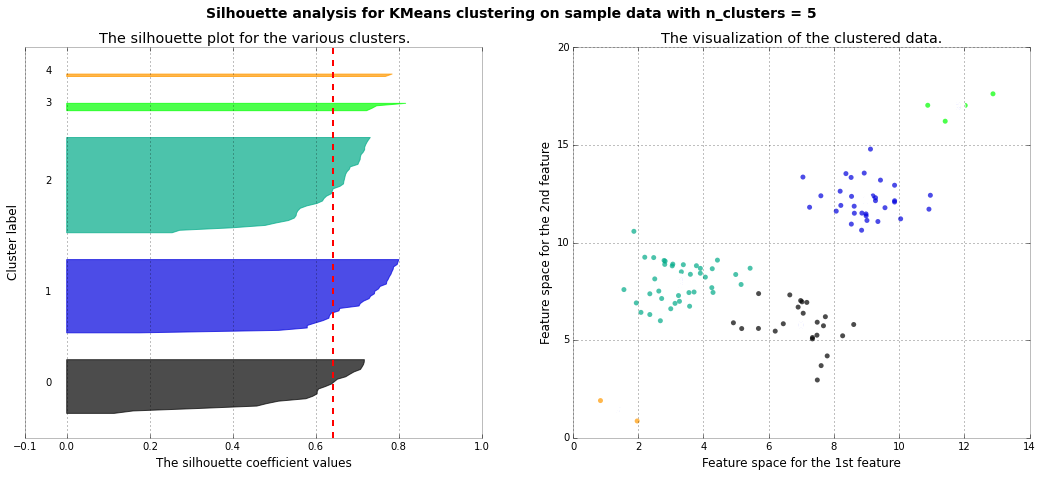

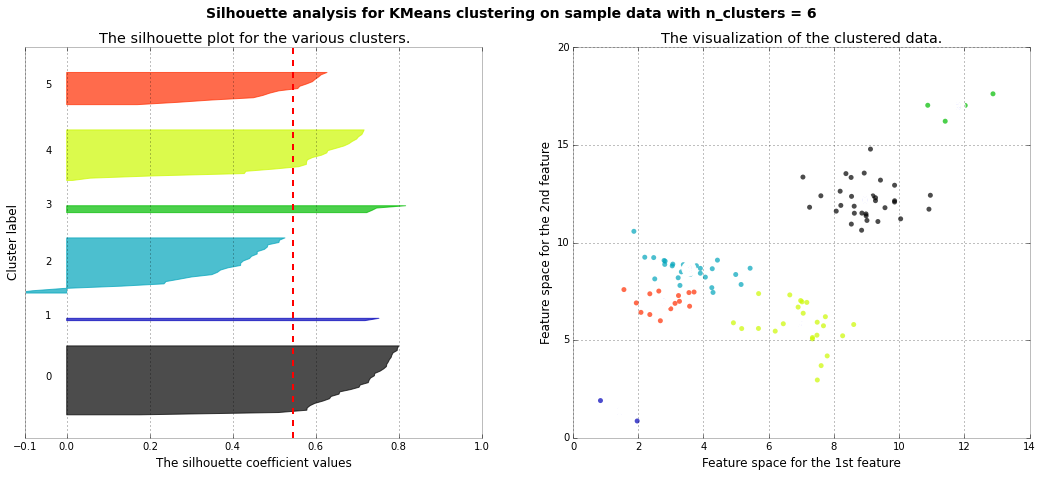

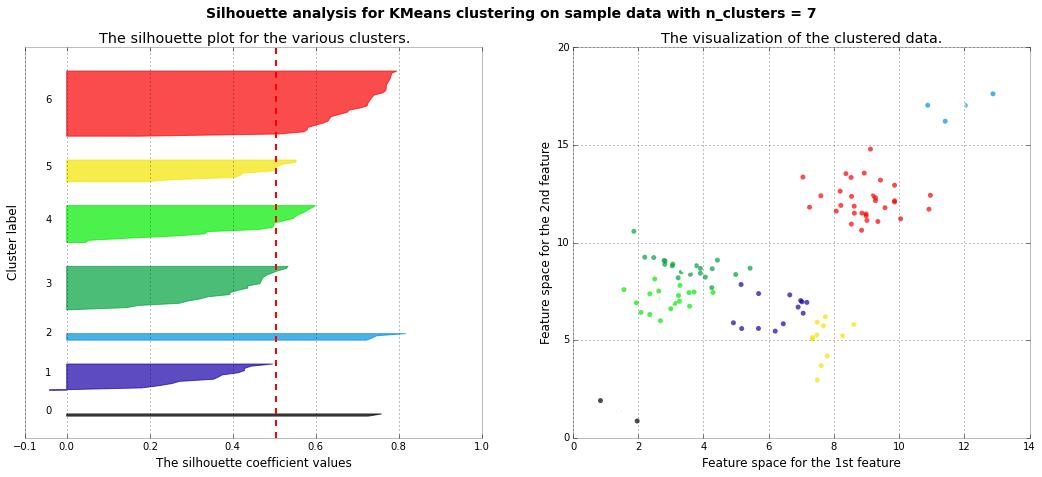

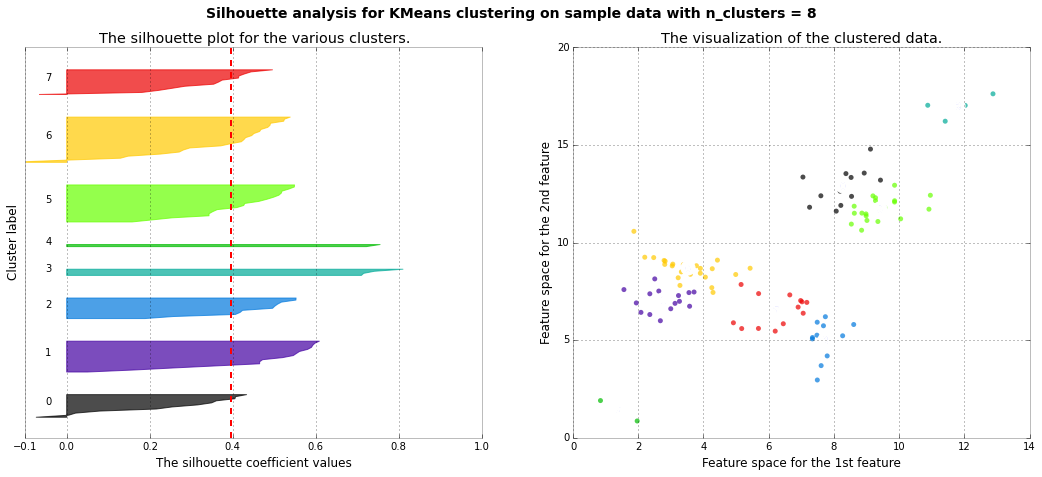

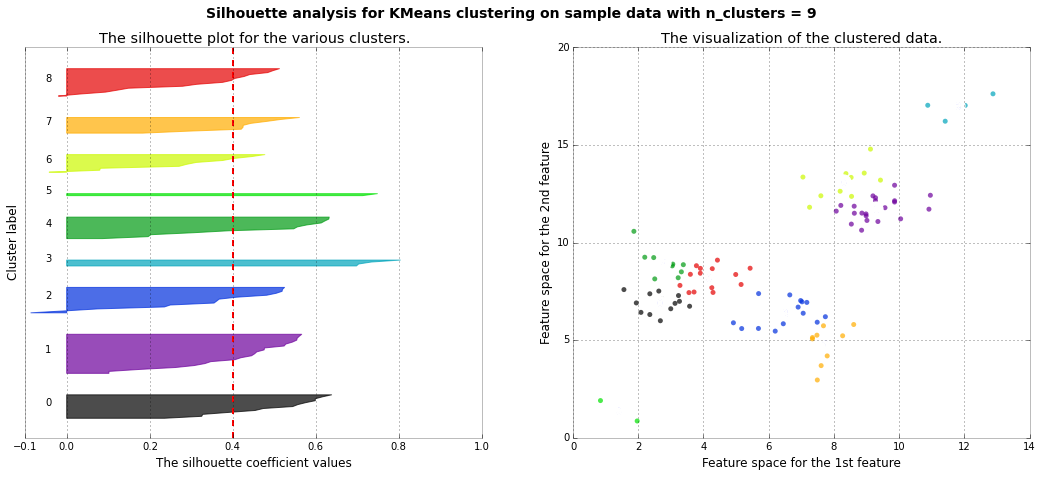

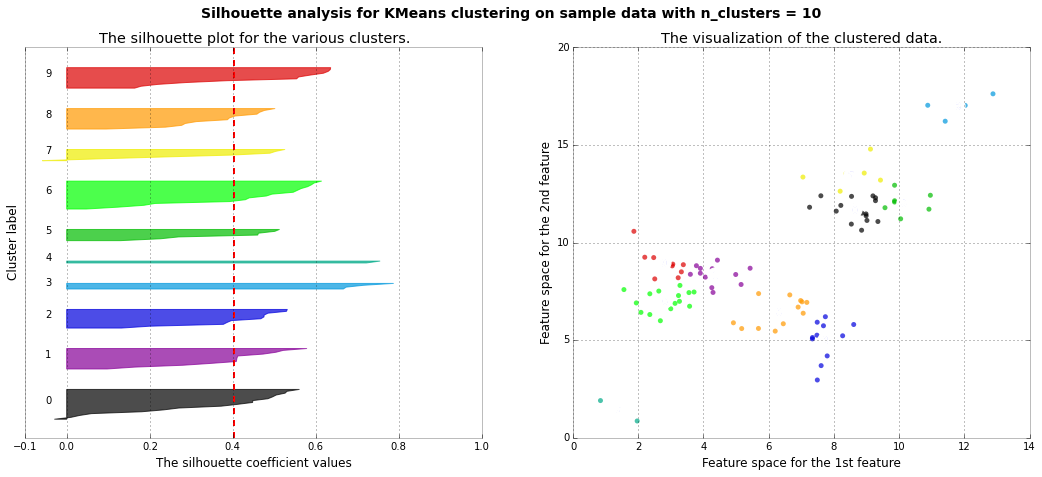

For n_clusters =2  The average silhouette_score is : 0.617395
For n_clusters =3  The average silhouette_score is : 0.602937
For n_clusters =4  The average silhouette_score is : 0.610331
For n_clusters =5  The average silhouette_score is : 0.640565
For n_clusters =6  The average silhouette_score is : 0.544091
For n_clusters =7  The average silhouette_score is : 0.504007
For n_clusters =8  The average silhouette_score is : 0.396389
For n_clusters =9  The average silhouette_score is : 0.401489
For n_clusters =10  The average silhouette_score is : 0.402609


In [192]:
#### code below was written using this perfect solution as an example: 
#### http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

kRange = range(2,11) ## range of kmeans
answersList = []

for n_clusters in kRange:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    ax1.set_xlim([-0.1, 1])

    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(data) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(data)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(data, cluster_labels)
    answersList.append({'a':"For n_clusters =%d  The average silhouette_score is : %f" % (n_clusters, silhouette_avg),
                        'n':n_clusters,
                        'score': silhouette_avg})

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(data, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them

        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhoutte score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(data.iloc[:, 0], data.iloc[:, 1], marker='.', s=100, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

for x in answersList: print x['a']

The best result so far is **0.640** which sits for **cluster nuber=5**

In [193]:
data2training = pd.read_csv( 'https://serv.cusp.nyu.edu/files/ADS-2015/MorningSection/lab5/H52train.csv' , index_col=0 )
data2test = pd.read_csv( 'https://serv.cusp.nyu.edu/files/ADS-2015/MorningSection/lab5/H52test.csv' , index_col=0 )

In [194]:
import requests
s = requests.get("https://raw.githubusercontent.com/Casyfill/CUSP_templates/master/Py/fbMatplotlibrc.json").json()
plt.rcParams.update(s)

### Problem 6a (15% credit) 
For the second dataset above train the logistic regression over the provided training set, report the summary with coeffieints, fit and statistics.

In [198]:
data2training.head()

,x1,x2,y
0,1.103418,5.160703,0
1,0.754804,5.846008,0
2,-1.651331,7.416112,0
3,-2.502233,7.799007,0
4,-0.183246,9.076321,0


In [199]:
logit = smf.logit('y ~ x1 + x2', data = data2training).fit()

Optimization terminated successfully.
         Current function value: 0.200402
         Iterations 8


In [200]:
le=logit.predict(data2test)

In [201]:
data2test['prob'] = le

data2test['predict'] = le >.5
# colors = cm.spectral(data2test.prob)

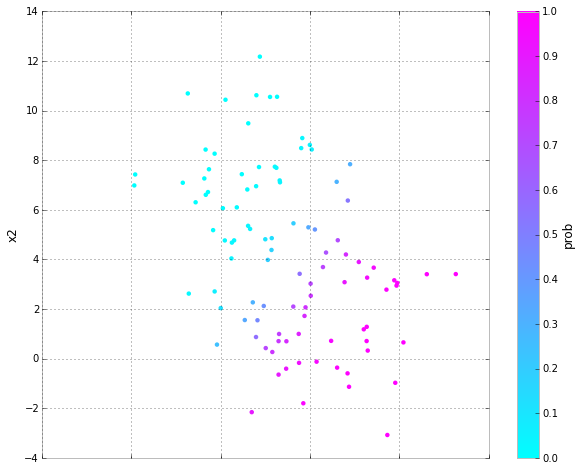

In [202]:
data2test.plot(x='x1', y='x2', 
               kind='scatter',
               lw=0, c='prob', cmap='cool', 
               figsize=(10,8));


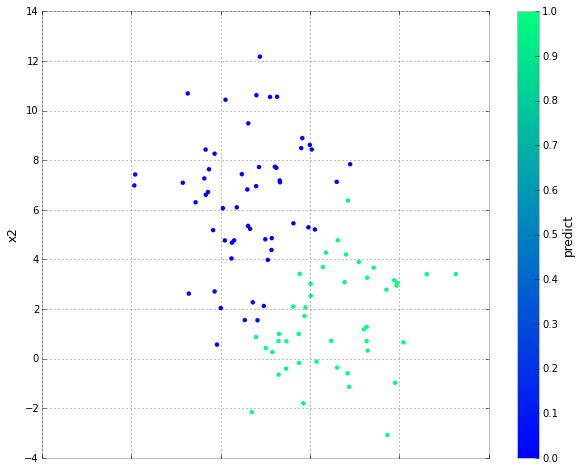

In [203]:
data2test.plot(x='x1', y='x2', 
               kind='scatter',
               lw=0, c='predict', cmap='winter', 
               figsize=(10,8));

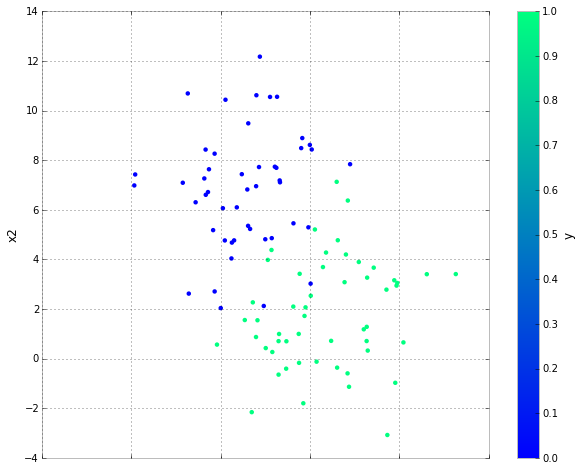

In [204]:
data2test.plot(x='x1', y='x2', 
               kind='scatter',
               lw=0, c='y', cmap='winter', 
               figsize=(10,8));

In [205]:
logit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                          Logit   Df Residuals:                       97
Method:                           MLE   Df Model:                            2
Date:                Mon, 19 Oct 2015   Pseudo R-squ.:                  0.6982
Time:                        00:17:53   Log-Likelihood:                -20.040
converged:                       True   LL-Null:                       -66.406
                                        LLR p-value:                 7.301e-21
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.5540      0.924     -0.600      0.549        -2.364     1.256
x1             0.7219      0.186      3.871      0.000         0.356     1.087
x2            -0.6982      0.203     -3.441      0.001        -1.096    -0.300
==============================================================================
"""

### Problem 6b (15% credit). 
For the second dataset and logistic regression above define the true and false positives/negatives over the validation set and visualize the classification through logit vs the true one.

In [207]:
def confMatrix(df,pcolumn, ycolumn):
    '''fancy way to do binary confusion matrix'''
    return df.groupby([ycolumn,pcolumn]).size().unstack()
    

In [210]:
def fptn(x):
    p, t = x.predict, x.y
    if p==True and t==True: return 'tp'
    elif p==False and t==False: return 'tn'
    elif p==True and t==False: return 'fp'
    elif p==False and t==True: return 'fn'
    
data2test['cmatrix'] = data2test.apply(fptn, 1)

In [217]:
data2test.cmatrix.value_counts()

tn    47
tp    44
fn     8
fp     1
Name: cmatrix, dtype: int64

In [212]:
confMatrix(data2test,'predict', 'y')

predict,False,True
y,,
0,47,1
1,8,44


In [215]:
getCMatrix(data2test.predict.astype(float).tolist() , data2test.y.tolist())


,predict 1,predict 0
actual v-s,,
1,44,8
0,1,47


In [165]:
data2test.cmatrix.value_counts()

tn    47
tp    44
fn     8
fp     1
Name: cmatrix, dtype: int64

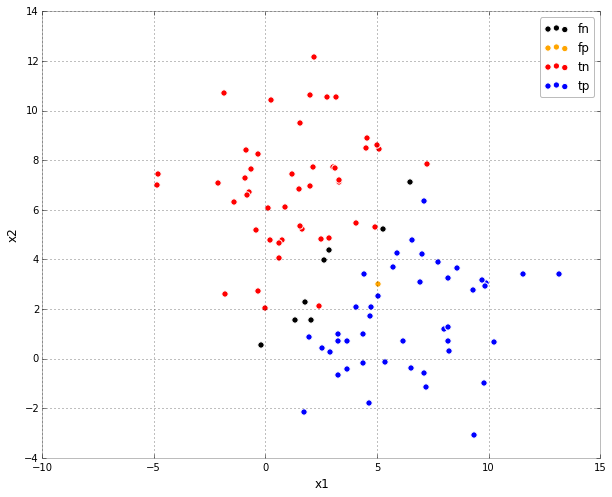

In [244]:
g = data2test.groupby('cmatrix')

fig, ax1 = plt.subplots(1,1, figsize=(10,8));

colorDict = {'tp':'b','tn':'r', 'fp':'orange','fn':'k'}

for name, group in g:
#     print name
    group.plot(x='x1',y='x2',kind='scatter', ax=ax1,s=40, color=colorDict[name], label=name)

ax1.legend(numpoints=1)
    

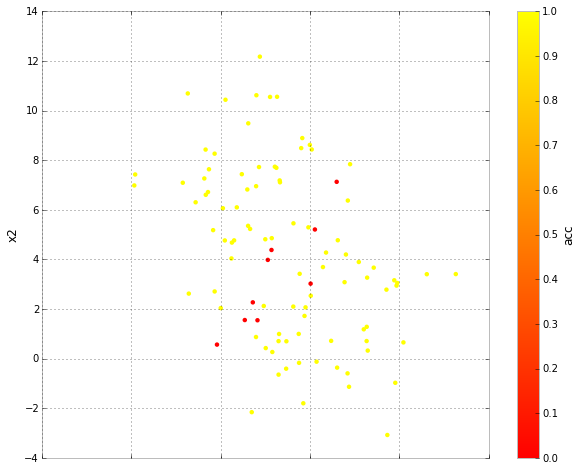

In [245]:
# just another option

data2test['acc'] = data2test.predict==data2test.y
data2test.plot(x='x1', y='x2', 
               kind='scatter',
               lw=0, c='acc', cmap='autumn', 
               figsize=(10,8));